In [154]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
import pickle

In [5]:
df = pd.read_csv('data/segmentation-data.csv')
df.set_index('ID', inplace=True)

## Getting summary statistic

Get describe and corr of features

In [ ]:
df.head()

In [8]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [9]:
df.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


## Getting heatmap plots

Text(0.5, 1.0, 'Correlation Heatmap')

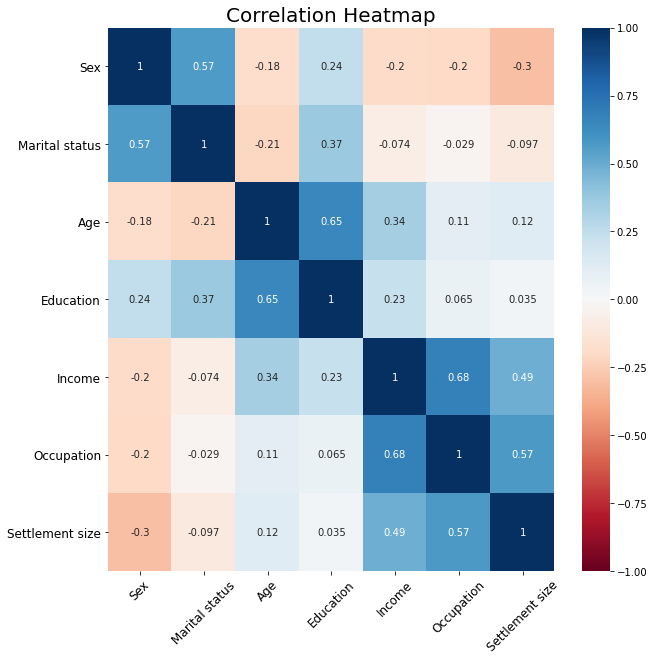

In [20]:
plt.figure(figsize=(10,10))
s = sns.heatmap(df.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)
s.set_yticklabels(s.get_yticklabels(), rotation=0, fontsize=12)
s.set_xticklabels(s.get_xticklabels(), rotation=45, fontsize=12)
plt.title('Correlation Heatmap', fontsize=20)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age', ylabel='Income'>

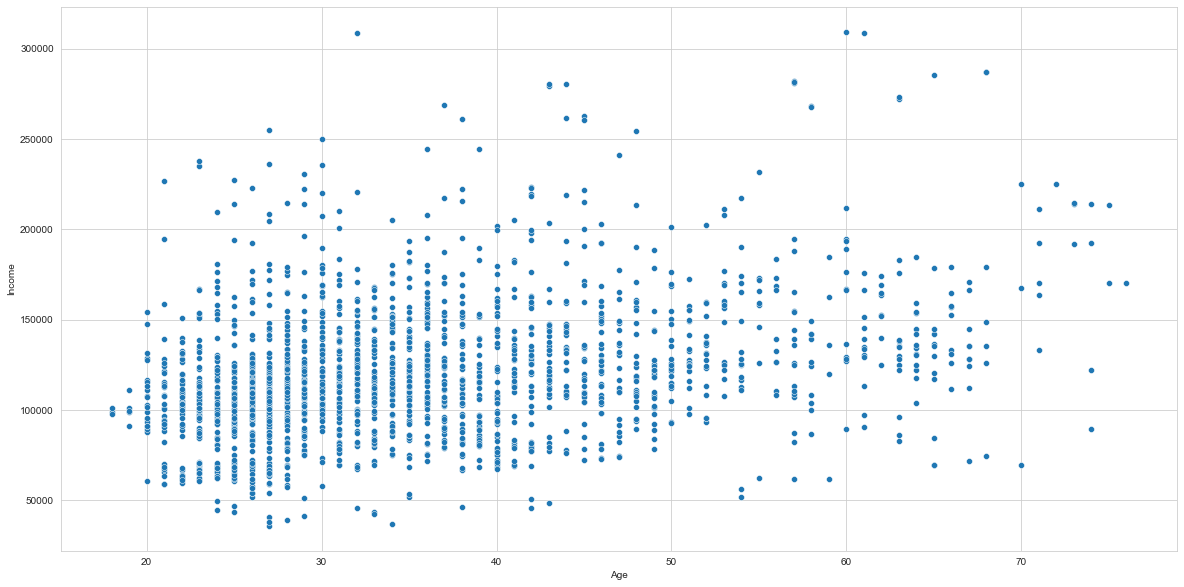

In [88]:
plt.figure(figsize=(20,10))
sns.scatterplot(df['Age'], df['Income'])

## Standardizing and Scaling Data

In [24]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [25]:
df_scaled

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

## Hierarchical Clustering

In [28]:
hclust = linkage(df_scaled, method='ward')

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [20.0, 20.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [90.0, 90.0, 110.0, 110.0],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [130.0, 130.0, 150.0, 150.0],
  [100.0, 100.0, 140.0, 140.0],
  [40.0, 40.0, 120.0, 120.0],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [210.0, 210.0, 230.0, 230.0],
  [180.0, 180.0, 220.0, 220.0],
  [245.0, 245.0, 255.0, 255.0],
  [265.0, 265.0, 275.0, 275.0],
  [250.0, 250.0, 270.0, 270.0],
  [285.0, 285.0, 295.0, 295.0],
  [305.0, 305.0, 315.0, 315.0],
  [290.0, 290.0, 310.0, 310.0],
  [260.0, 260.0, 300.0, 300.0],
  [200.0, 200.0, 280.0, 280.0],
  [80.0, 80.0, 240.0, 240.0],
  [325.0, 325.0, 335.0, 335.0],
  [345

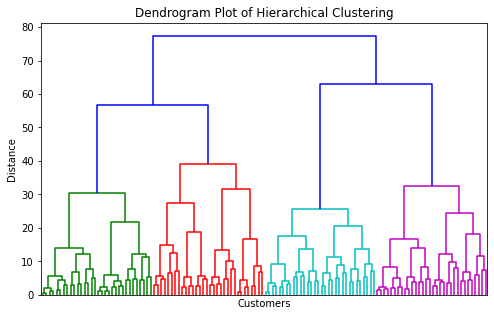

In [37]:
plt.figure(figsize=(8,5))
plt.title('Dendrogram Plot of Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Distance')
dendrogram(hclust, show_leaf_counts=False, no_labels=True, truncate_mode='level', p=6)

## Kmeans Clustering

In [39]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

Text(0.5, 0, 'No. of Clusters')

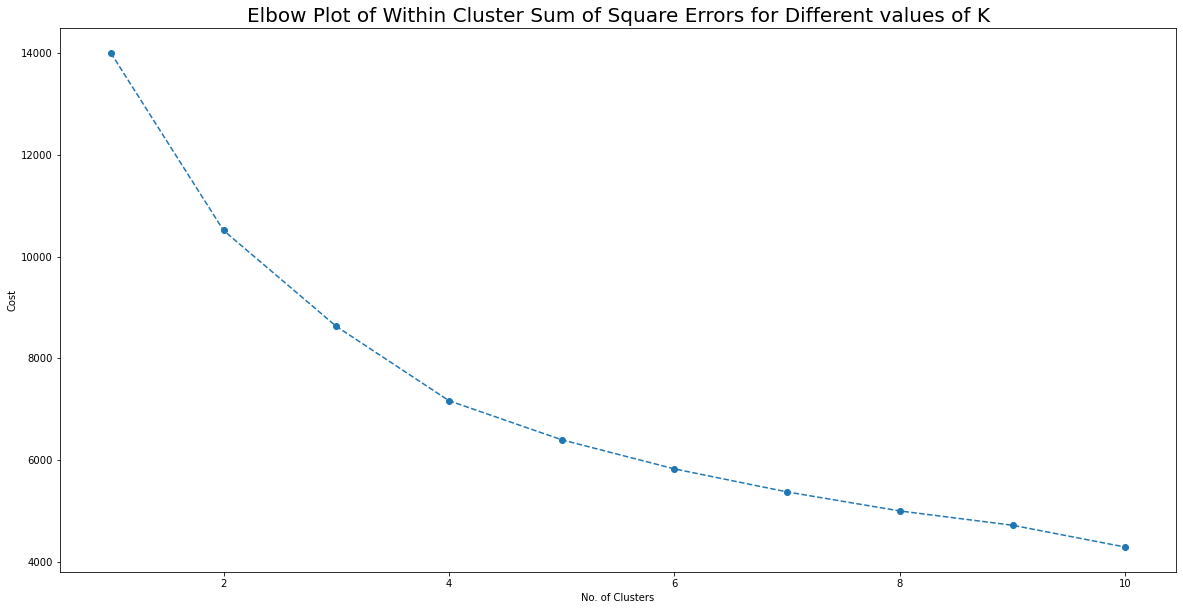

In [50]:
plt.figure(figsize=(20,10))
plt.plot([i for i in range(1, 11)], wcss, marker='o', linestyle='--')
plt.title('Elbow Plot of Within Cluster Sum of Square Errors for Different values of K', fontsize=20)
plt.ylabel('Cost')
plt.xlabel('No. of Clusters')

In [51]:
# assuming 4 clusters based on elbow plot

In [52]:
kmeans_final = KMeans(n_clusters=4, random_state=42)
kmeans_final.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [78]:
df_seg = df.copy()
df_seg['Kmeans_Labels'] = kmeans_final.labels_

In [80]:
df_gb = df_seg.groupby('Kmeans_Labels').mean()
df_gb

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Kmeans_Labels,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


In [81]:
df_gb['N_obs'] = df_seg[['Kmeans_Labels','Sex']].groupby('Kmeans_Labels').count()
df_gb['Proportion'] = round(df_gb['N_obs'] / df_gb['N_obs'].sum(), 2)

In [82]:
df_gb

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N_obs,Proportion
Kmeans_Labels,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.13
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.23
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.35
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.28


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age', ylabel='Income'>

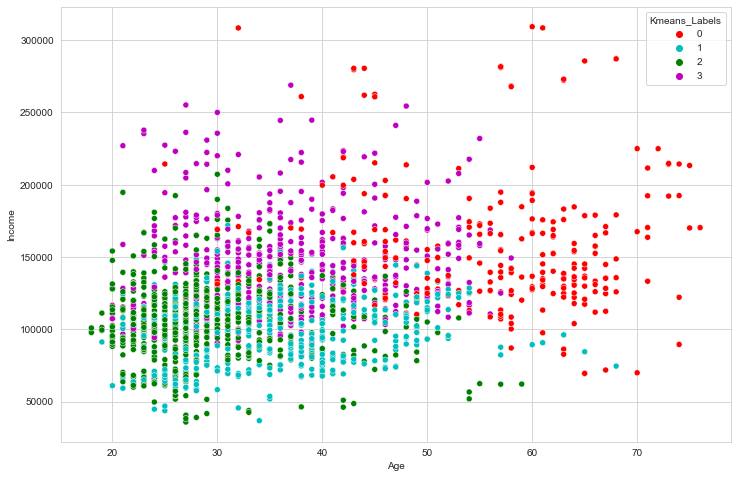

In [90]:
plt.figure(figsize=(12,8))
sns.scatterplot(df_seg['Age'], df_seg['Income'], hue=df_seg['Kmeans_Labels'], palette=['r', 'c', 'g', 'm'])

## Applying PCA for dimensionality reduction

In [92]:
pca = PCA()
pca.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [93]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0.5, 1.0, 'Explained Variance by Components')

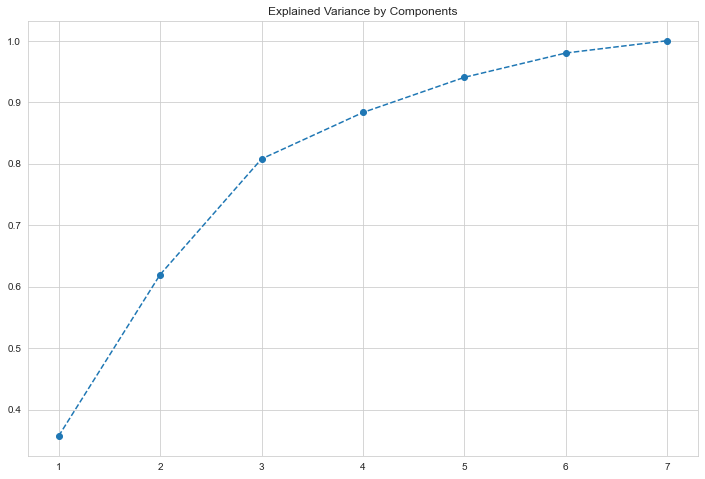

In [95]:
plt.figure(figsize=(12,8))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')

In [96]:
# choosing 3 componets....

In [97]:
pca = PCA(n_components=3)
pca.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [98]:
# looking at loadings of each components
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [111]:
df_pca_comp = pd.DataFrame(data=pca.components_,
                          columns = df.columns.values,
                          index=['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


Text(0.5, 1.0, 'Heatmap of PCA Components loading correlations')

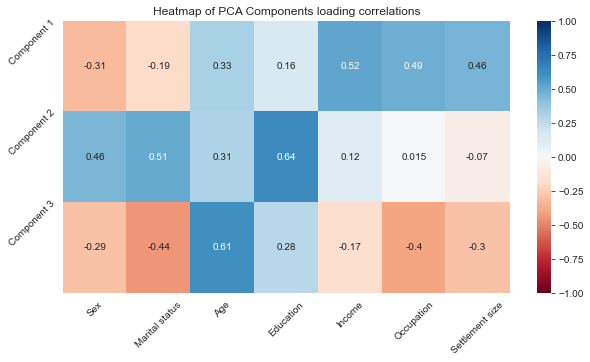

In [114]:
plt.figure(figsize=(10,5))
sns.heatmap(df_pca_comp,
            vmin=-1,
            vmax=1,
            annot=True,
            cmap='RdBu')
plt.yticks([0, 1, 2],
           ['Component 1', 'Component 2', 'Component 3'],
           rotation=45)
plt.xticks(rotation=45)
plt.title('Heatmap of PCA Components loading correlations')

In [116]:
scores_pca = pca.transform(df_scaled)
scores_pca

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

## Repeating KMeans on the new PCA Transformed Data

In [117]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(i, init='k-means++', random_state=42)
    kmeans.fit(scores_pca)
    wcss.append(kmeans.inertia_)

Text(0.5, 0, 'No. of Clusters')

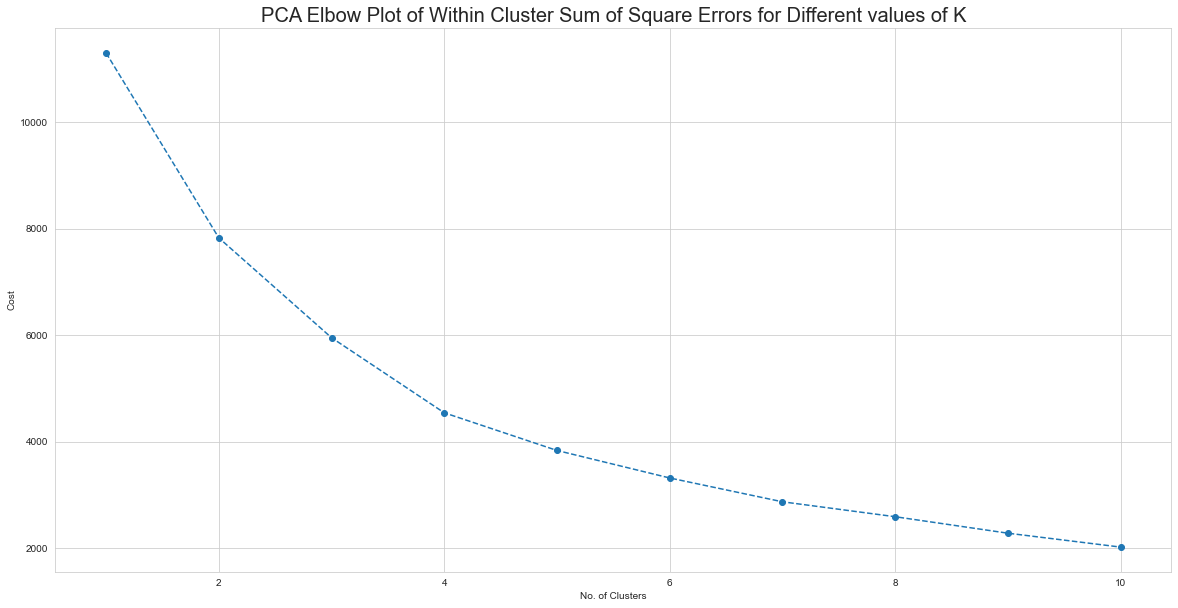

In [118]:
plt.figure(figsize=(20,10))
plt.plot([i for i in range(1, 11)], wcss, marker='o', linestyle='--')
plt.title('PCA Elbow Plot of Within Cluster Sum of Square Errors for Different values of K', fontsize=20)
plt.ylabel('Cost')
plt.xlabel('No. of Clusters')

In [119]:
kmeans_final = KMeans(n_clusters=4, random_state=42)
kmeans_final.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [120]:
df_seg_pca = df.copy()
df_seg_pca['Kmeans_Labels'] = kmeans_final.labels_

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age', ylabel='Income'>

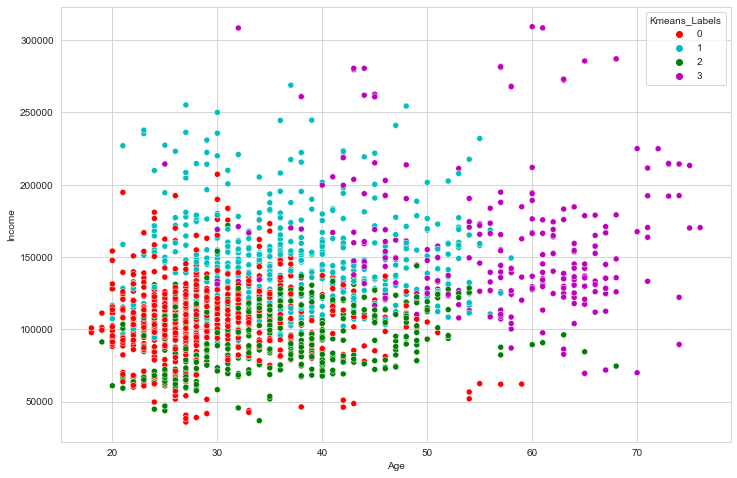

In [147]:
plt.figure(figsize=(12,8))
sns.scatterplot(df_seg_pca['Age'], df_seg_pca['Income'], hue=df_seg_pca['Kmeans_Labels'], palette=['r', 'c', 'g', 'm'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

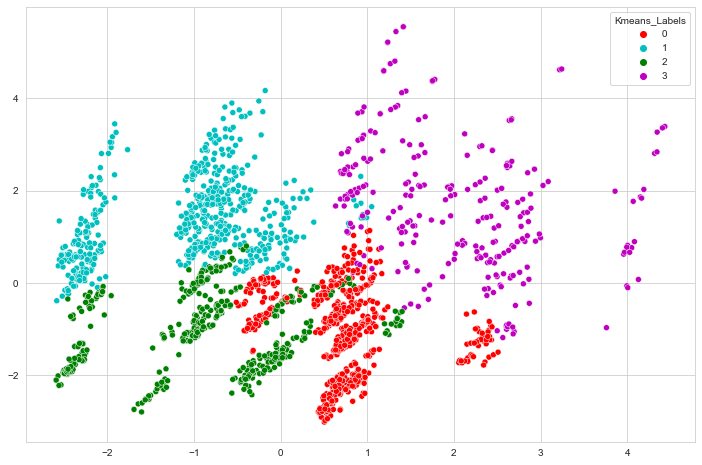

In [153]:
plt.figure(figsize=(12,8))
sns.scatterplot(scores_pca[:,1],scores_pca[:,0], hue=df_seg_pca['Kmeans_Labels'], palette=['r', 'c', 'g', 'm'])

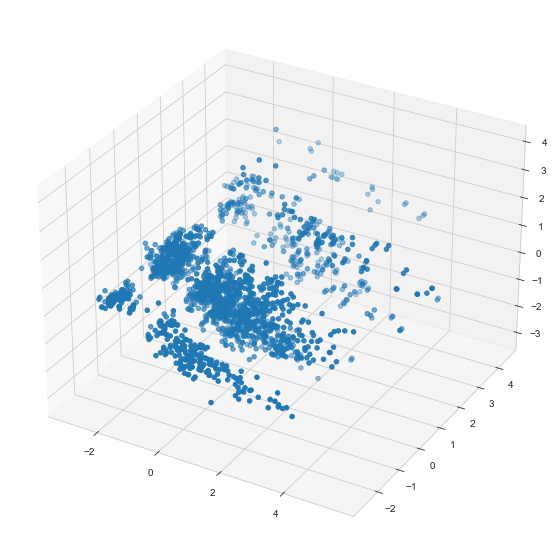

In [155]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(scores_pca[:, 0], scores_pca[:, 1], scores_pca[:, 2])
plt.show()

## Saving files as pickle

In [156]:
pickle.dump(scaler, open('scaler.pickle', 'wb'))
pickle.dump(pca, open('pca.pickle', 'wb'))
pickle.dump(kmeans_final, open('kmeans-pca.pickle', 'wb'))